 # ===============  machine learning project  ===============

In [331]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings as wr
wr.filterwarnings("ignore")

In [332]:
# load file

data = pd.read_csv("C:\\Users\\RAHUL\\Desktop\\project 4\\data5.csv")
data

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,"11,999"
3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,"5,649"
4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,"8,999"
...,...,...,...,...,...,...,...,...,...,...,...
536,SAMSUNG Galaxy S23 5G,Cream,256,8,3900,50MP,12MP,0,15.49,Qualcomm Snapdragon 8 Gen 2,"79,999"
537,LAVA Z21,Cyan,32,2,3100,5MP,2MP,0,12.70,Octa Core,"5,998"
538,Tecno Spark 8T,Turquoise Cyan,64,4,5000,50MP,8MP,0,16.76,MediaTek Helio G35,"9,990"
539,SAMSUNG Galaxy A54 5G,Awesome Lime,128,8,5000,50MP,32MP,0,16.26,"Exynos 1380, Octa Core","38,999"


In [333]:
# check data types of data

data.dtypes

Model             object
Colour            object
Memory             int64
RAM                int64
Battery_           int64
Rear Camera       object
Front Camera      object
AI Lens            int64
Mobile Height    float64
Processor_        object
Prize             object
dtype: object

In [334]:
data.shape

(541, 11)

In [335]:
# drop duplicates in dataset

data.drop_duplicates(inplace = True)

In [336]:
data.shape

(531, 11)

In [337]:
data["Prize"] = data["Prize"].str.replace(",", "" , regex = True)

In [338]:
# dtype change of prize column

data["Prize"] = data["Prize"].astype({"Prize" : "float64"})

In [339]:
data.dtypes

Model             object
Colour            object
Memory             int64
RAM                int64
Battery_           int64
Rear Camera       object
Front Camera      object
AI Lens            int64
Mobile Height    float64
Processor_        object
Prize            float64
dtype: object

In [340]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 531 entries, 0 to 540
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Model          531 non-null    object 
 1   Colour         531 non-null    object 
 2   Memory         531 non-null    int64  
 3   RAM            531 non-null    int64  
 4   Battery_       531 non-null    int64  
 5   Rear Camera    531 non-null    object 
 6   Front Camera   531 non-null    object 
 7   AI Lens        531 non-null    int64  
 8   Mobile Height  531 non-null    float64
 9   Processor_     531 non-null    object 
 10  Prize          531 non-null    float64
dtypes: float64(2), int64(4), object(5)
memory usage: 49.8+ KB


In [341]:
# check null value in dataset

data.isnull().sum()

Model            0
Colour           0
Memory           0
RAM              0
Battery_         0
Rear Camera      0
Front Camera     0
AI Lens          0
Mobile Height    0
Processor_       0
Prize            0
dtype: int64

# find and remove outlier in dataset

In [342]:
data.describe()

,Memory,RAM,Battery_,AI Lens,Mobile Height,Prize
count,531.000000,531.000000,531.000000,531.000000,531.000000,531.000000
mean,110.915254,5.401130,4873.877589,0.064030,16.450019,16305.775895
std,60.872883,1.991283,765.883129,0.245037,2.494246,10847.038354
min,16.000000,2.000000,800.000000,0.000000,4.500000,920.000000
25%,64.000000,4.000000,5000.000000,0.000000,16.510000,9368.000000
50%,128.000000,6.000000,5000.000000,0.000000,16.710000,13999.000000
75%,128.000000,8.000000,5000.000000,0.000000,16.940000,19338.500000
max,256.000000,8.000000,7000.000000,1.000000,41.940000,80999.000000


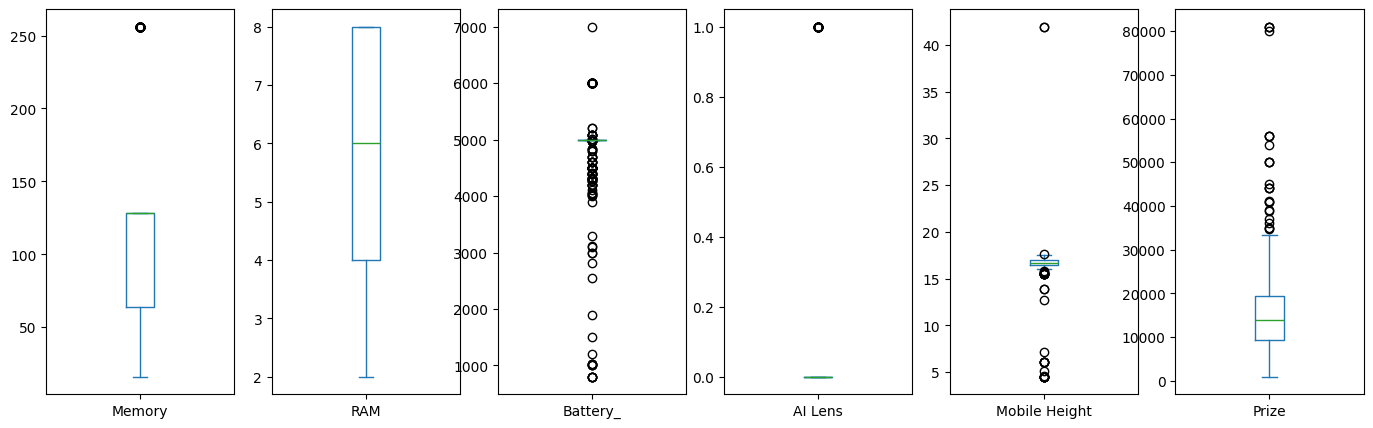

In [343]:
data.plot(kind = "box" , subplots = True ,sharey= False , figsize= (17,5))
plt.show()

In [344]:
# remove outlier from dataset using IQR mothod

def outliers(data,columns) :

    q1 = data[columns].quantile(0.25)
    q3 = data[columns].quantile(0.75)
    IQR = q3 - q1
    min_range = q1 - (1.5 * IQR)
    max_range = q1 + (1.5 * IQR) 
    
    ls = data.index[ (data[columns] < min_range) | (data[columns] > max_range)]

    return ls
    

In [345]:
def remove_outliers(data,ls) :
     ls = sorted(set(ls))
     data = data.drop(ls)
     return data

In [346]:
index_list = []

for col in data[["Mobile Height" , "Battery_"]] :
    index_list.extend(outliers(data,col))

index_list


[75,
 88,
 98,
 108,
 116,
 118,
 133,
 135,
 136,
 152,
 155,
 156,
 181,
 182,
 193,
 205,
 223,
 225,
 227,
 228,
 229,
 230,
 239,
 241,
 243,
 244,
 245,
 246,
 250,
 268,
 269,
 270,
 271,
 308,
 309,
 327,
 335,
 337,
 348,
 396,
 404,
 407,
 418,
 453,
 456,
 460,
 466,
 474,
 502,
 511,
 522,
 532,
 536,
 537,
 0,
 1,
 10,
 12,
 13,
 36,
 37,
 41,
 44,
 45,
 50,
 51,
 54,
 55,
 59,
 60,
 65,
 89,
 90,
 92,
 98,
 108,
 112,
 114,
 115,
 116,
 117,
 118,
 121,
 130,
 133,
 135,
 136,
 152,
 154,
 155,
 156,
 159,
 165,
 181,
 182,
 193,
 209,
 217,
 222,
 225,
 227,
 228,
 229,
 230,
 239,
 240,
 244,
 245,
 246,
 248,
 250,
 255,
 260,
 261,
 268,
 269,
 270,
 271,
 272,
 277,
 280,
 283,
 286,
 293,
 294,
 302,
 305,
 306,
 308,
 309,
 312,
 313,
 319,
 324,
 325,
 327,
 328,
 329,
 342,
 343,
 345,
 354,
 358,
 364,
 365,
 369,
 386,
 393,
 394,
 396,
 400,
 407,
 409,
 416,
 417,
 418,
 419,
 426,
 430,
 431,
 434,
 440,
 445,
 447,
 450,
 451,
 453,
 454,
 455,
 456,
 457,


In [347]:
new_data = remove_outliers(data,index_list)

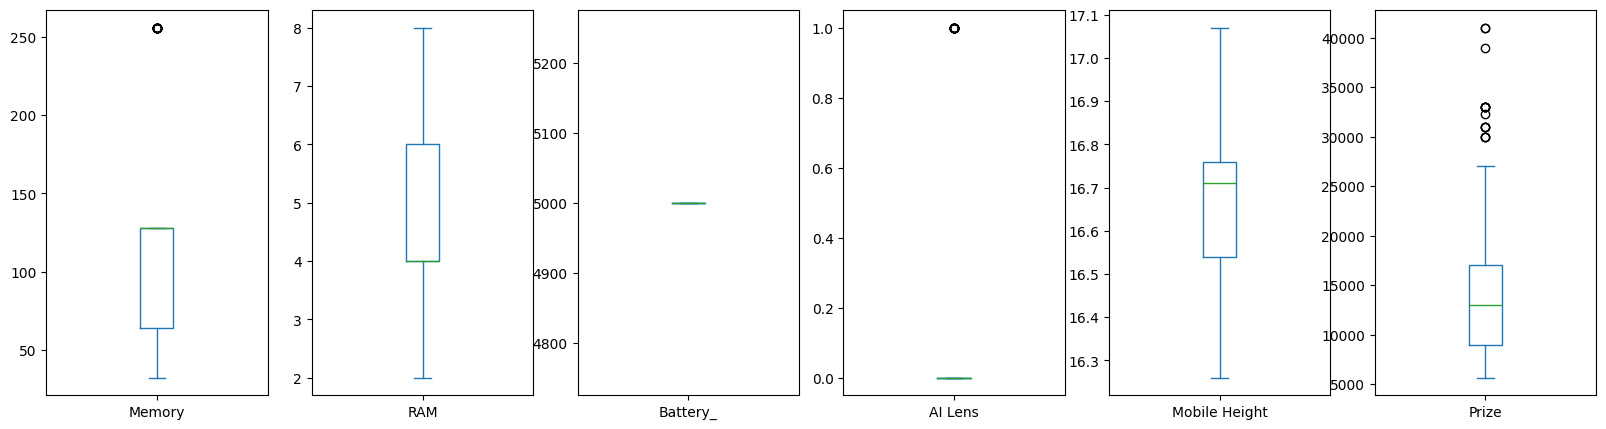

In [348]:
# after remove outlier from dataset then create boxplot

new_data.plot(kind = "box" , subplots = True , sharey = False , figsize = (20,5))
plt.show()

In [349]:
data.shape

(531, 11)

In [350]:
# new features create in dataset

new_data[["brand" , "Model"]] = new_data["Model"].str.extract(r"([a-zA-Z]+)\s*(.*)")
new_data

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize,brand
2,G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,11999.0,MOTOROLA
3,C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,5649.0,POCO
4,HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,8999.0,Infinix
5,HOT 30i,Glacier Blue,128,8,5000,50MP,5MP,1,16.76,G37,8999.0,Infinix
6,HOT 30i,Mirror Black,128,8,5000,50MP,5MP,1,16.76,G37,8999.0,Infinix
...,...,...,...,...,...,...,...,...,...,...,...,...
534,G11 Plus,Grey,64,4,5000,50MP,8MP,0,16.55,Octa Core,9790.0,Nokia
535,Galaxy A04e,Light Blue,64,3,5000,13MP,5MP,0,16.51,Mediatek Helio P35,9999.0,SAMSUNG
538,Spark 8T,Turquoise Cyan,64,4,5000,50MP,8MP,0,16.76,MediaTek Helio G35,9990.0,Tecno
539,Galaxy A54 5G,Awesome Lime,128,8,5000,50MP,32MP,0,16.26,"Exynos 1380, Octa Core",38999.0,SAMSUNG


In [351]:
def price_range(Prize) :

    if Prize < 20000:
        return "low"
    elif 20001<= Prize <= 40000:
        return "medium"
    else:
        return "high"
    
new_data["price range"] = new_data["Prize"].apply(price_range)

In [352]:
new_data_order = ["brand" ,'Model',"Colour","Memory","RAM","Battery_","Rear Camera","Front Camera" ,"AI Lens","Mobile Height","Processor_","Prize" , "price range"]

In [353]:
new_data = new_data[new_data_order]


In [354]:
new_data.reset_index(drop=True , inplace = True )

In [355]:
# data type changed of rear camera

new_data["Rear Camera"] = new_data["Rear Camera"].str.replace("MP" , " " ,regex=True).astype(int)

In [356]:
# data type changed of front camera

new_data['Front Camera'] = new_data["Front Camera"].str.replace("MP", " " ,regex = True).astype(int)

In [357]:
new_data

,brand,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize,price range
0,MOTOROLA,G32,Mineral Gray,128,8,5000,50,16,0,16.64,Qualcomm Snapdragon 680,11999.0,low
1,POCO,C50,Royal Blue,32,2,5000,8,5,0,16.56,Mediatek Helio A22,5649.0,low
2,Infinix,HOT 30i,Marigold,128,8,5000,50,5,1,16.76,G37,8999.0,low
3,Infinix,HOT 30i,Glacier Blue,128,8,5000,50,5,1,16.76,G37,8999.0,low
4,Infinix,HOT 30i,Mirror Black,128,8,5000,50,5,1,16.76,G37,8999.0,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,Nokia,G11 Plus,Grey,64,4,5000,50,8,0,16.55,Octa Core,9790.0,low
367,SAMSUNG,Galaxy A04e,Light Blue,64,3,5000,13,5,0,16.51,Mediatek Helio P35,9999.0,low
368,Tecno,Spark 8T,Turquoise Cyan,64,4,5000,50,8,0,16.76,MediaTek Helio G35,9990.0,low
369,SAMSUNG,Galaxy A54 5G,Awesome Lime,128,8,5000,50,32,0,16.26,"Exynos 1380, Octa Core",38999.0,medium


In [358]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   brand          371 non-null    object 
 1   Model          371 non-null    object 
 2   Colour         371 non-null    object 
 3   Memory         371 non-null    int64  
 4   RAM            371 non-null    int64  
 5   Battery_       371 non-null    int64  
 6   Rear Camera    371 non-null    int64  
 7   Front Camera   371 non-null    int64  
 8   AI Lens        371 non-null    int64  
 9   Mobile Height  371 non-null    float64
 10  Processor_     371 non-null    object 
 11  Prize          371 non-null    float64
 12  price range    371 non-null    object 
dtypes: float64(2), int64(6), object(5)
memory usage: 37.8+ KB


In [359]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 531 entries, 0 to 540
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Model          531 non-null    object 
 1   Colour         531 non-null    object 
 2   Memory         531 non-null    int64  
 3   RAM            531 non-null    int64  
 4   Battery_       531 non-null    int64  
 5   Rear Camera    531 non-null    object 
 6   Front Camera   531 non-null    object 
 7   AI Lens        531 non-null    int64  
 8   Mobile Height  531 non-null    float64
 9   Processor_     531 non-null    object 
 10  Prize          531 non-null    float64
dtypes: float64(2), int64(4), object(5)
memory usage: 65.9+ KB


# connect dataset into mysql

In [360]:
# connect to mysql

import mysql.connector
from mysql.connector import Error



HOSTNAME = '127.0.0.1'
USERNAME = "root"
PASSWORD = "Rahul@20200"
DATABASE = "handset"       


In [361]:
connection = mysql.connector.connect(host = HOSTNAME ,
                                    user = USERNAME ,
                                    password = PASSWORD ,
                                    database = DATABASE,
                                    port = 3306 )
                                    

if connection.is_connected() :
    print(F"succesefully connected database : {DATABASE}")

succesefully connected database : handset


In [362]:
new_data.columns.tolist()

['brand',
 'Model',
 'Colour',
 'Memory',
 'RAM',
 'Battery_',
 'Rear Camera',
 'Front Camera',
 'AI Lens',
 'Mobile Height',
 'Processor_',
 'Prize',
 'price range']

In [363]:

def push_data_to_dataset (data) :

 connection = mysql.connector.connect(host = HOSTNAME ,
                                    user = USERNAME ,
                                    password = PASSWORD ,
                                    database = DATABASE,
                                    port = 3306)

 if connection.is_connected() :
    print(F"succesefully connected database : {DATABASE}")
    conn_cur = connection.cursor()

    for i in zip ( data["Model"],
                   data["Colour"],
                   data["Memory"],
                   data["RAM"],
                   data["Battery_"],
                   data["Rear Camera"],
                   data["Front Camera"],
                   data["AI Lens"],
                   data["Mobile Height"],
                   data["Processor_"],
                   data["Prize"] ) :
        
        my_query = """INSERT INTO price ( Model,                              
                                          Colour ,
                                          Memory,
                                          RAM,
                                          Battery_ ,
                                          Rear_Camera ,
                                          Front_Camera,
                                          AI_Lens ,
                                          MObile_Height ,
                                          Processor_ ,
                                          Prize )
                                 VALUES  (   
                                              %s,
                                              %s,
                                              %s,
                                              %s,
                                              %s,
                                              %s,
                                              %s,
                                              %s,
                                              %s,
                                              %s,
                                              %s
                                          ); """
        try :
           conn_cur.execute(my_query, i)
           connection.commit()
        except Exception as e :
           Error_message = F"Errortime error {e}"
           print(Error_message)
            
        
    print(f"pused_data : {i}")



In [364]:
#push_data_to_dataset(data)

# exploratory data analysis

In [365]:
new_data.shape

(371, 13)

In [366]:
# questions 
# 1. top ten most  no.model sales in price
# 2. top ten less no.model sales in price
# 3. most memory and ram of sales
# 4. most no. sales regarding in battery
# 5. no. mobile sale in camera
# 6. no mobile sale in mobile height
# 7. find best processor of moblie
# 8. which is best mobile find in low price range ?
# 9. what is  expensive  model ?
# 10. mobile company wise making  sale report 

In [367]:
new_data["Model"].value_counts().to_clipboard()

In [368]:
new_data["Processor_"].value_counts().to_clipboard()

In [369]:
new_data[["Model" , "Prize"]].value_counts().to_clipboard()

In [370]:
new_data["Prize"].value_counts().sort_index()

Prize
5649.0     2
5990.0     1
5999.0     8
6199.0     4
6299.0     5
          ..
30999.0    3
32299.0    1
32999.0    5
38999.0    1
40999.0    2
Name: count, Length: 100, dtype: int64

In [371]:
# filter out rows in handset prize is 5000 to 20000

connection = mysql.connector.connect(host = HOSTNAME ,
                                   user = USERNAME ,
                                    password = PASSWORD ,
                                    database = DATABASE)
Query = "select * From Price where Prize between 5000 and 20000"
path1 = pd.read_sql(Query , con = connection)
path1

,Model,Colour,Memory,RAM,Battery_,Rear_Camera,Front_Camera,AI_Lens,Mobile_Height,Processor_,Prize
0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,17.0,Unisoc Spreadtrum SC9863A1,7299.0
1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,17.0,Unisoc Spreadtrum SC9863A1,7299.0
2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,17.0,Qualcomm Snapdragon 680,11999.0
3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,17.0,Mediatek Helio A22,5649.0
4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,17.0,G37,8999.0
...,...,...,...,...,...,...,...,...,...,...,...
387,Nokia G11 Plus,Grey,64,4,5000,50MP,8MP,0,17.0,Octa Core,9790.0
388,SAMSUNG Galaxy A04e,Light Blue,64,3,5000,13MP,5MP,0,17.0,Mediatek Helio P35,9999.0
389,LAVA Z21,Cyan,32,2,3100,5MP,2MP,0,13.0,Octa Core,5998.0
390,Tecno Spark 8T,Turquoise Cyan,64,4,5000,50MP,8MP,0,17.0,MediaTek Helio G35,9990.0


In [372]:

# filter out rows in handset prize is 20000 to 40000

connection = mysql.connector.connect(host = HOSTNAME ,
                                   user = USERNAME ,
                                    password = PASSWORD ,
                                    database = DATABASE)
Query = "select * From Price where Prize between 20001 and 40001"
path2 = pd.read_sql(Query , con = connection)
path2

,Model,Colour,Memory,RAM,Battery_,Rear_Camera,Front_Camera,AI_Lens,Mobile_Height,Processor_,Prize
0,vivo T2 5G,Velocity Wave,128,8,4500,40MP,16MP,0,16.0,Snapdragon 695,20999.0
1,vivo T2 5G,Nitro Blaze,128,8,4500,40MP,16MP,0,16.0,Snapdragon 695,20999.0
2,MOTOROLA Edge 40,Eclipse Black,256,8,4400,50MP,32MP,0,17.0,Dimensity 8020,29999.0
3,Google Pixel 6a,Chalk,128,6,4410,12MP,8MP,0,16.0,Google Tensor,28999.0
4,Google Pixel 6a,Charcoal,128,6,4410,12MP,8MP,0,16.0,Google Tensor,28999.0
...,...,...,...,...,...,...,...,...,...,...,...
100,IQOO Neo 7 5G,Frost Blue,256,4,5000,64MP,16MP,0,17.0,Dimensity 8200,34688.0
101,vivo Y100 5G,Metal Black,128,8,4500,64MP,16MP,0,16.0,Mediatek Dimensity 900,23999.0
102,vivo Y100 5G,Twilight Gold,128,8,4500,64MP,16MP,0,16.0,Mediatek Dimensity 900,23999.0
103,OPPO F21s Pro,Starlight Black,128,8,4500,64MP,16MP,0,16.0,Qualcomm SM6225 Snapdragon 680 4G (6 nm),20890.0


In [373]:

# filter out rows in handset prize is 40000 to 82000

connection = mysql.connector.connect(host = HOSTNAME ,
                                   user = USERNAME ,
                                    password = PASSWORD ,
                                    
                                    database = DATABASE)
Query = "select * From Price where Prize between 41000 and 82000"
path3 = pd.read_sql(Query , con = connection)
path3

,Model,Colour,Memory,RAM,Battery_,Rear_Camera,Front_Camera,AI_Lens,Mobile_Height,Processor_,Prize
0,SAMSUNG Galaxy S22 Plus 5G,Phantom Black,128,8,4500,50MP,10MP,0,17.0,Qualcomm Snapdragon 8 Gen 1,49999.0
1,SAMSUNG Galaxy Z Flip3 5G,Phantom Black,128,8,3300,12MP,10MP,0,17.0,Qualcomm Snapdragon 888 Octa-Core,44999.0
2,Google Pixel 7a,Sea,128,8,4300,64MP,13MP,0,15.0,Tensor G2,43999.0
3,Google Pixel 7a,Charcoal,128,8,4300,64MP,13MP,0,15.0,Tensor G2,43999.0
4,Google Pixel 7a,Snow,128,8,4300,64MP,13MP,0,15.0,Tensor G2,43999.0
5,MOTOROLA Edge 30 Ultra,Interstellar Black,256,4,4610,200MP,60MP,0,17.0,Qualcomm Snapdragon 8+ Gen 1,49999.0
6,Google Pixel 7,Snow,128,8,4270,50MP,8MP,0,16.0,Google Tensor G2,55999.0
7,Google Pixel 7,Obsidian,128,8,4270,50MP,8MP,0,16.0,Google Tensor G2,55999.0
8,Google Pixel 7,Lemongrass,128,8,4270,50MP,8MP,0,16.0,Google Tensor G2,55999.0
9,APPLE iPhone 11,Black,64,8,3110,12MP,12MP,0,15.0,ios,41199.0


In [374]:
# question 1. top ten high price no.model sales

path3.nlargest(10 , 'Prize')

,Model,Colour,Memory,RAM,Battery_,Rear_Camera,Front_Camera,AI_Lens,Mobile_Height,Processor_,Prize
11,APPLE iPhone 14 Plus,Midnight,128,6,4323,12MP,12MP,0,17.0,IOS,80999.0
12,APPLE iPhone 14 Plus,Purple,128,3,4323,12MP,12MP,0,17.0,6 Core,80999.0
13,APPLE iPhone 14 Plus,Starlight,128,4,4323,12MP,12MP,0,17.0,ios,80999.0
15,SAMSUNG Galaxy S23 5G,Cream,256,8,3900,50MP,12MP,0,15.0,Qualcomm Snapdragon 8 Gen 2,79999.0
6,Google Pixel 7,Snow,128,8,4270,50MP,8MP,0,16.0,Google Tensor G2,55999.0
7,Google Pixel 7,Obsidian,128,8,4270,50MP,8MP,0,16.0,Google Tensor G2,55999.0
8,Google Pixel 7,Lemongrass,128,8,4270,50MP,8MP,0,16.0,Google Tensor G2,55999.0
14,APPLE iPhone 12,Blue,64,8,2815,12MP,12MP,0,15.0,ios,53999.0
0,SAMSUNG Galaxy S22 Plus 5G,Phantom Black,128,8,4500,50MP,10MP,0,17.0,Qualcomm Snapdragon 8 Gen 1,49999.0
5,MOTOROLA Edge 30 Ultra,Interstellar Black,256,4,4610,200MP,60MP,0,17.0,Qualcomm Snapdragon 8+ Gen 1,49999.0


In [375]:
# question 2 top ten less price no.model sales

path1.nsmallest(10, "Prize")

,Model,Colour,Memory,RAM,Battery_,Rear_Camera,Front_Camera,AI_Lens,Mobile_Height,Processor_,Prize
3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,17.0,Mediatek Helio A22,5649.0
18,POCO C50,Country Green,32,2,5000,8MP,5MP,0,17.0,Mediatek Helio A22,5649.0
338,Nokia C01 Plus,Grey,16,2,3000,5MP,2MP,0,14.0,Unisoc SC9863A,5799.0
283,itel A60,SapphireBlack,32,2,5000,8MP,5MP,0,17.0,Unisoc,5990.0
389,LAVA Z21,Cyan,32,2,3100,5MP,2MP,0,13.0,Octa Core,5998.0
66,realme C30,Denim Black,32,2,5000,8MP,5MP,0,17.0,Unisoc T612,5999.0
150,Infinix Smart 6 HD,Force Black,32,2,5000,8MP,5MP,0,17.0,Mediatek Helio A22,5999.0
151,Infinix Smart 6 HD,Aqua Sky,32,2,5000,8MP,5MP,0,17.0,Mediatek Helio A22,5999.0
152,Infinix Smart 6 HD,Origin Blue,32,2,5000,8MP,5MP,0,17.0,Mediatek Helio A22,5999.0
207,Micromax IN 2C,Silver,32,3,5000,8MP,5MP,0,17.0,Unisoc T610,5999.0


In [376]:
# question 3. no.mobile sale in  memory and ram 

p = new_data[["Memory" ,"RAM"]].value_counts().sort_index()
p

Memory  RAM
32      2       20
        3       24
64      2       11
        3        9
        4      101
        6       13
128     4       29
        6       79
        8       63
256     2        1
        4        1
        6        1
        8       19
Name: count, dtype: int64

Text(0.5, 1.0, 'sale report of memory and ram')

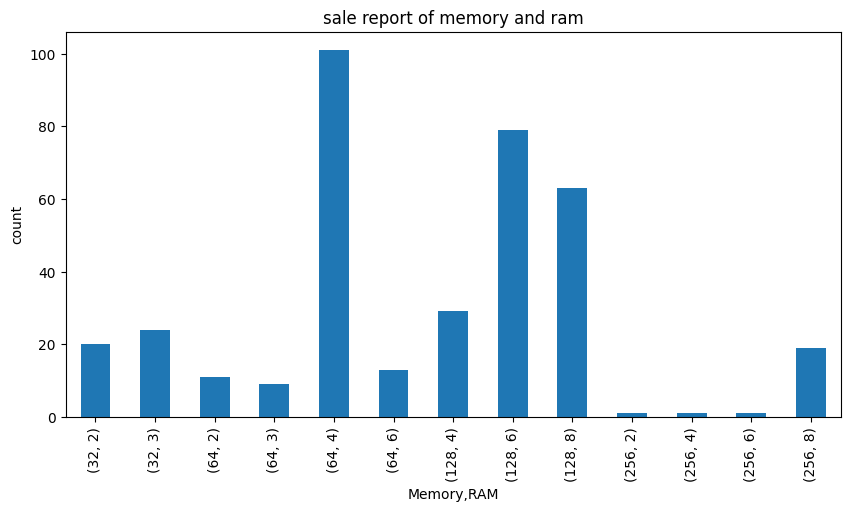

In [377]:
new_data[["Memory" , 'RAM']].value_counts().sort_index().plot(kind = "bar", ylabel = "count" , figsize=(10,5))
plt.title("sale report of memory and ram")


# percentage sale report of memory

In [378]:
a = new_data["Memory"].value_counts().index.tolist()

b = new_data["Memory"].value_counts().values.tolist()


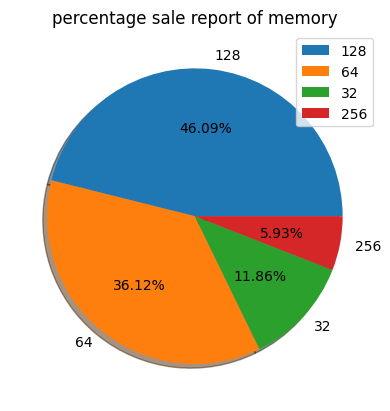

In [379]:
plt.pie(x = b , labels = a , autopct = "%0.2f%%" , shadow = True , radius = 1 )
plt.title('percentage sale report of memory')
plt.legend(loc = 1 )
plt.show()

# percentage sale report of RAM

In [380]:
a1 = new_data["RAM"].value_counts().index.tolist()

b1 = new_data["RAM"].value_counts().values.tolist()


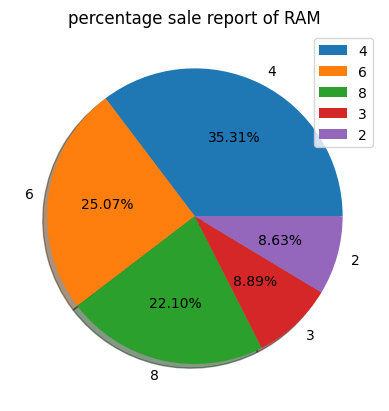

In [381]:
plt.pie( x = b1 , labels = a1 , autopct = "%0.2f%%" , shadow = True ,radius = 1 )
plt.title("percentage sale report of RAM")
plt.legend(loc = 1)
plt.show()

# observation  : 
1. maximum mobile sale in which is memory and Ram is [(64,4),(128,8),(128,6)] ,
2. which is mobile memory is 128 GB so no. mobile will be more sale  ,
3. which is mobile ram is [ 8 and 6 GB] so no. mobile will be more sale

In [382]:
# question 4  most no. sales regarding in battery

new_data["Battery_"].value_counts()

Battery_
5000    371
Name: count, dtype: int64

# obeservation : 
maximum no. of mobile sale in which is battery is 5000 mAh

In [383]:
# question 5 no. mobile sale in camera

new_data[["Front Camera" , "Rear Camera"]].value_counts()

Front Camera  Rear Camera
8             50             75
16            50             67
5             8              48
              13             40
              50             30
16            108            25
13            50             18
16            64             16
13            48             16
8             64             11
16            48              8
8             13              7
32            50              3
8             48              2
              8               1
              108             1
              16              1
13            64              1
32            108             1
Name: count, dtype: int64

<Axes: xlabel='Front Camera,Rear Camera', ylabel='count'>

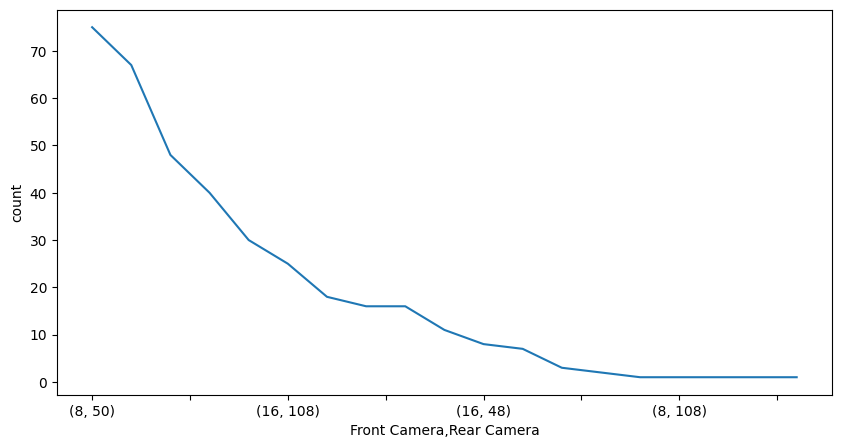

In [384]:
new_data[["Front Camera" , "Rear Camera" ]].value_counts().plot(kind = "line" ,ylabel = "count" , figsize = (10 ,5))

<Axes: xlabel='Rear Camera'>

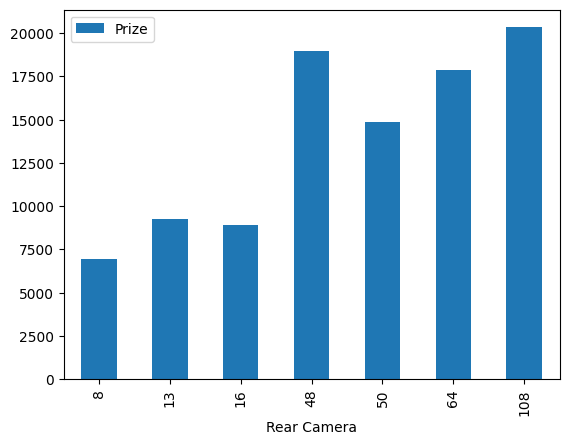

In [385]:
new_data.groupby(by = ["Rear Camera"]).agg({"Prize" : "mean"}).plot(kind = "bar")

<Axes: xlabel='Front Camera'>

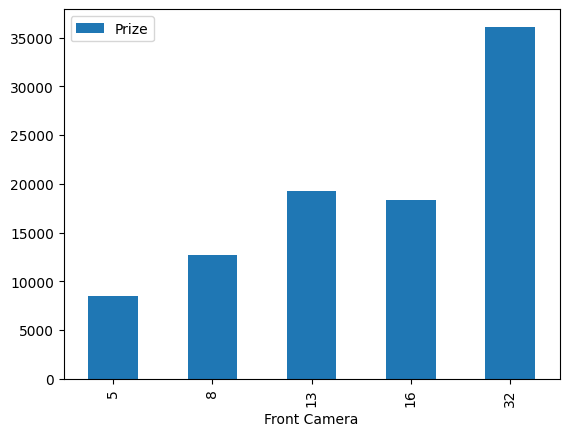

In [386]:
new_data.groupby(by = ["Front Camera"] ).agg ({"Prize" : "mean"}).plot(kind = "bar")

<Axes: xlabel='Front Camera', ylabel='Rear Camera'>

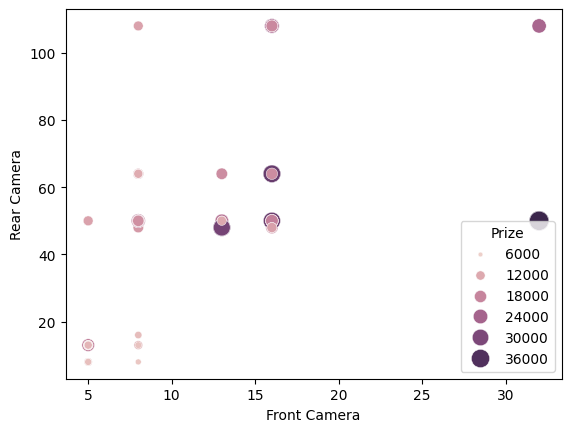

In [387]:
sns.scatterplot(data = new_data , y = "Rear Camera" , x = "Front Camera"  ,   hue = "Prize" , size = "Prize" , sizes =(10,200))

# observation :
1. in front and rear camera 12 mp  so less mobile sale due to apple is brand mobile so it giving a less features so price will high
2. in most no. sale of mobile due to mobile company  vivo , readmi , poco are giving an average features and price will be came so no . model selling increase

In [388]:
# 6. no mobile sale in mobile height

new_data["Mobile Height"].value_counts()

Mobile Height
16.76    99
16.51    57
16.94    42
16.71    33
16.56    20
17.02    18
16.66    17
17.07    17
16.54    10
16.26    10
16.59    10
16.64     8
16.36     8
16.33     7
17.04     6
16.43     4
16.81     3
16.55     2
Name: count, dtype: int64

In [389]:
# 7. find best processor of moblie

new_data["Processor_"].value_counts()

Processor_
Qualcomm Snapdragon 680       24
Unisoc T612                   21
Mediatek Helio A22            19
Mediatek Helio P35            16
Qualcomm Snapdragon 695 5G    14
                              ..
MTK Dimensity 700              1
Mediatek Dimensity 900         1
MediaTek Helio G85             1
Octa-core                      1
Exynos Octa Core               1
Name: count, Length: 74, dtype: int64

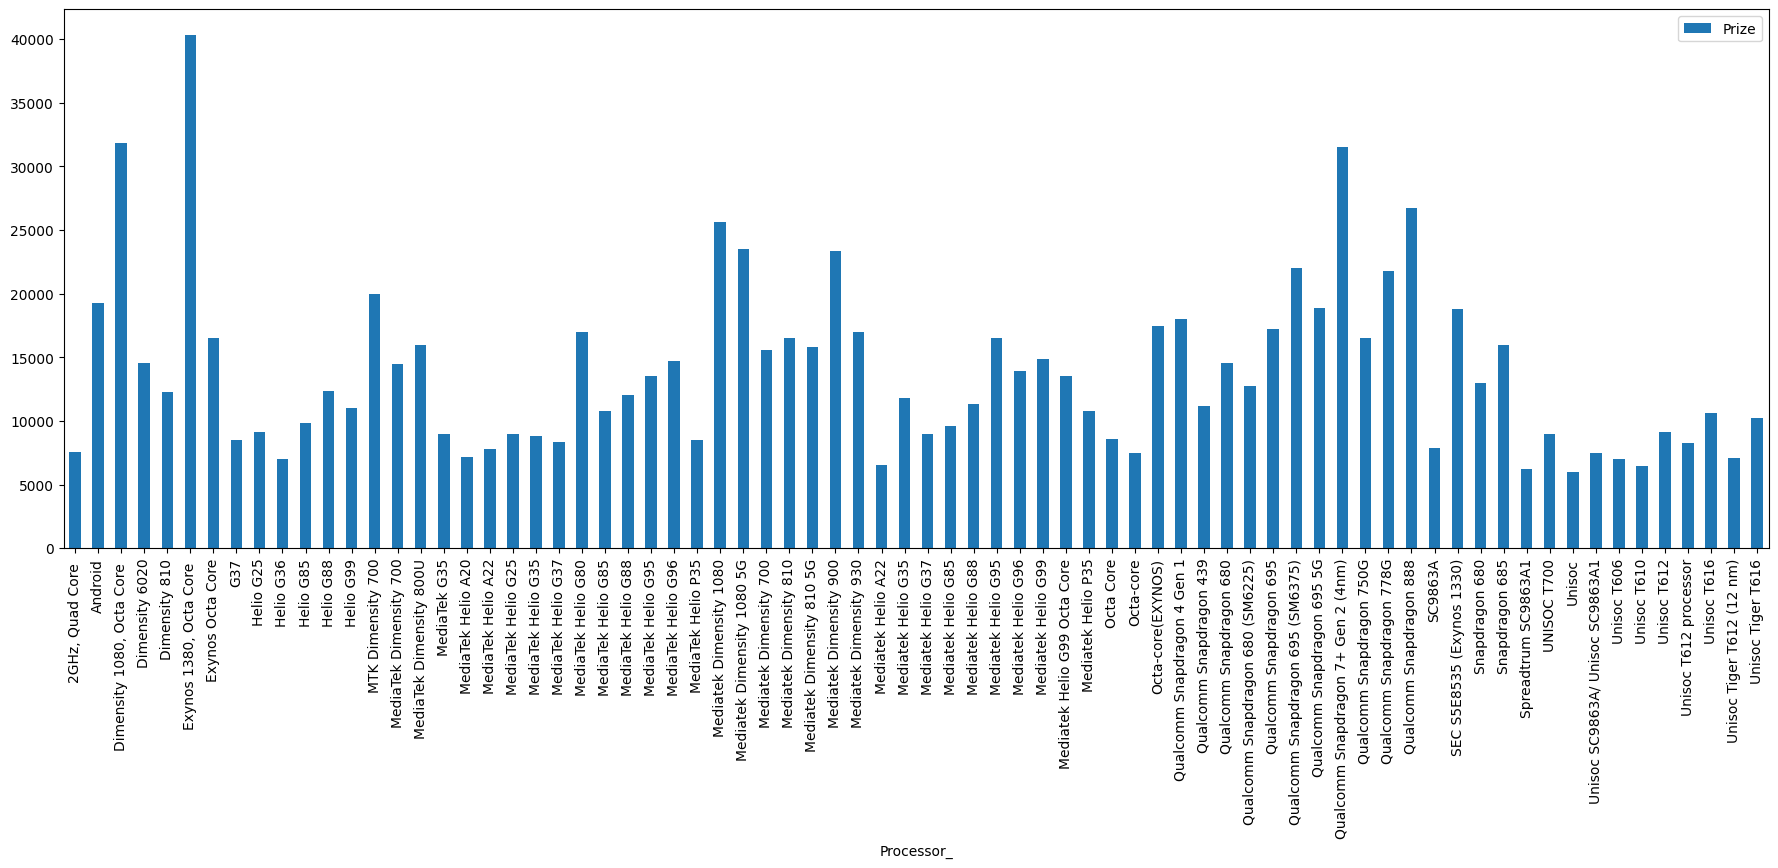

In [390]:
new_data.groupby(by = "Processor_").agg({"Prize" : "mean"}).plot(kind = "bar" , figsize = (22,7))
plt.xticks(rotation = 90)
plt.show()

In [391]:
query = "select * from price where Processor_ = 'Qualcomm Snapdragon 680' ; "
path = pd.read_sql(query , con = connection)
path

,Model,Colour,Memory,RAM,Battery_,Rear_Camera,Front_Camera,AI_Lens,Mobile_Height,Processor_,Prize
0,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,17.0,Qualcomm Snapdragon 680,11999.0
1,REDMI 10,Shadow Black,64,4,6000,50MP,5MP,0,17.0,Qualcomm Snapdragon 680,9499.0
2,REDMI 10,Caribbean Green,128,6,6000,50MP,5MP,0,17.0,Qualcomm Snapdragon 680,10999.0
3,MOTOROLA G32,Satin Silver,128,8,5000,50MP,16MP,0,17.0,Qualcomm Snapdragon 680,11999.0
4,REDMI 10,Sunrise Orange,64,4,6000,50MP,5MP,0,17.0,Qualcomm Snapdragon 680,9499.0
5,REDMI 10,Caribbean Green,64,4,6000,50MP,5MP,0,17.0,Qualcomm Snapdragon 680,9499.0
6,REDMI 10,Pacific Blue,128,6,6000,50MP,5MP,0,17.0,Qualcomm Snapdragon 680,10999.0
7,REDMI 10,Midnight Black,64,4,6000,50MP,5MP,0,17.0,Qualcomm Snapdragon 680,9499.0
8,MOTOROLA g42,Atlantic Green,64,4,5000,50MP,16MP,0,16.0,Qualcomm Snapdragon 680,11248.0
9,vivo T1 44W,Midnight Galaxy,128,8,5000,50MP,16MP,0,16.0,Qualcomm Snapdragon 680,17999.0


In [392]:
query = "select * from price  where Processor_ in (select Processor_   from price group by Processor_ having Count(*) = 1 ) ;"
path = pd.read_sql(query , con = connection)
path

,Model,Colour,Memory,RAM,Battery_,Rear_Camera,Front_Camera,AI_Lens,Mobile_Height,Processor_,Prize
0,realme Narzo 30 Pro 5G,Blade Silver,128,8,5000,48MP,16MP,0,17.0,MediaTek Dimensity 800U,15999.0
1,micromax 3,Racing Black,64,4,800,2MP,0MP,0,5.0,0 0 0 208MHz,2490.0
2,MOTOROLA e40,Carbon Gray,64,4,5000,48MP,8MP,0,17.0,UNISOC T700,8999.0
3,realme narzo 50i Prime,Mint Green,32,3,5000,8MP,5MP,0,17.0,Unisoc Tiger T612 (12 nm),7115.0
4,SAMSUNG Galaxy S22 Plus 5G,Phantom Black,128,8,4500,50MP,10MP,0,17.0,Qualcomm Snapdragon 8 Gen 1,49999.0
5,redmi max,M3),16,8,1200,2MP,0MP,0,6.0,MT6260A,3549.0
6,redmi mono,M3),16,4,1000,0MP,0MP,0,5.0,MTK6261D,1699.0
7,redmi min,M3),16,4,1000,0MP,0MP,0,5.0,Spreadtrum,920.0
8,micromax,Lake Blue,64,4,1500,0MP,0MP,0,6.0,Mediatek MT6261D,1199.0
9,SAMSUNG Galaxy Z Flip3 5G,Phantom Black,128,8,3300,12MP,10MP,0,17.0,Qualcomm Snapdragon 888 Octa-Core,44999.0


In [393]:
# 8. which is best mobile find in high price range ?

new_data[new_data["Prize"] == new_data["Prize"].max()]

,brand,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize,price range
327,SAMSUNG,Galaxy A54 5G,Awesome Graphite,256,8,5000,50,32,0,16.26,"Exynos 1380, Octa Core",40999.0,high
355,SAMSUNG,Galaxy A54 5G,Awesome Violet,256,8,5000,50,32,0,16.26,"Exynos 1380, Octa Core",40999.0,high


In [394]:
# 9. which is best mobile find in low price range ?

new_data[new_data["Prize"] == new_data["Prize"].min()]

,brand,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize,price range
1,POCO,C50,Royal Blue,32,2,5000,8,5,0,16.56,Mediatek Helio A22,5649.0,low
13,POCO,C50,Country Green,32,2,5000,8,5,0,16.56,Mediatek Helio A22,5649.0,low


# making sale report of mobile company

In [395]:
new_data["brand"].value_counts()

brand
realme      88
POCO        56
REDMI       45
Infinix     41
SAMSUNG     37
MOTOROLA    34
vivo        34
Tecno       13
OPPO        12
itel         3
Micromax     2
I            2
Redmi        2
LAVA         1
Nokia        1
Name: count, dtype: int64

In [396]:
a1 = new_data["brand"].value_counts().index.tolist()

In [397]:
a2 = new_data["brand"].value_counts().values

In [398]:
# 10 . mobile company wise making a sale report 

empty_list = [ ]

for col , val in zip(a1 , a2) :

    print("*" * 60)
    print(f'mobile company {col} is no.  of mobile sale is {val}')
    percentage_count = round (val / new_data.shape[0] * 100 ,2 )
    print(f"total percentage value of {col} in {percentage_count}%")
    empty_list.append(percentage_count)
    print("*" * 60)

a3 = pd.DataFrame({ "col name" : a1 ,
                    "model sale" : a2 ,
                    "percentage_count" : empty_list})
a3

************************************************************
mobile company realme is no.  of mobile sale is 88
total percentage value of realme in 23.72%
************************************************************
************************************************************
mobile company POCO is no.  of mobile sale is 56
total percentage value of POCO in 15.09%
************************************************************
************************************************************
mobile company REDMI is no.  of mobile sale is 45
total percentage value of REDMI in 12.13%
************************************************************
************************************************************
mobile company Infinix is no.  of mobile sale is 41
total percentage value of Infinix in 11.05%
************************************************************
************************************************************
mobile company SAMSUNG is no.  of mobile sale is 37
total percentage value of S

,col name,model sale,percentage_count
0,realme,88,23.72
1,POCO,56,15.09
2,REDMI,45,12.13
3,Infinix,41,11.05
4,SAMSUNG,37,9.97
5,MOTOROLA,34,9.16
6,vivo,34,9.16
7,Tecno,13,3.50
8,OPPO,12,3.23
9,itel,3,0.81


In [399]:
p = a3["col name"]

Text(0.5, 1.0, 'total sale report')

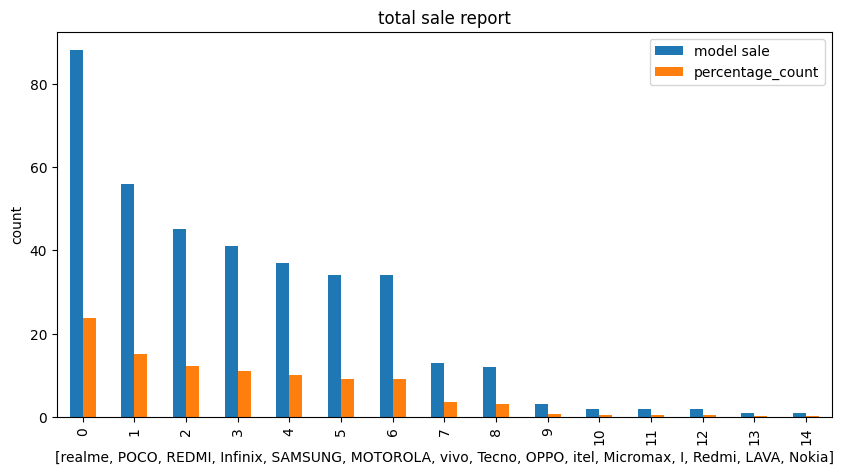

In [400]:
a3.plot(kind = "bar",xlabel = p , ylabel = "count" , figsize=(10,5))

plt.title("total sale report")

# convert categorical data into int 

In [401]:
# import libraries of labelencoder and onehotencoder

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [402]:
brand_la = LabelEncoder()
new_data["brand"] = brand_la.fit_transform(new_data["brand"])

In [403]:
la2 = LabelEncoder()
new_data["Model"]=la2.fit_transform(new_data["Model"])

In [404]:
la3 = LabelEncoder()
new_data["Colour"]=la3.fit_transform(new_data["Colour"])

In [405]:
la4 = LabelEncoder()
new_data["Processor_"]=la4.fit_transform(new_data["Processor_"])

In [406]:
la5 = LabelEncoder()
new_data["price range"] = la5.fit_transform(new_data["price range"])

In [407]:
#encoded = pd.get_dummies(new_data , columns=["price range"])
#encoded

In [408]:
# datatype changed in price encoded column

#encoded["price range_high"] = encoded["price range_high"].astype(int)
#encoded["price range_low"] = encoded["price range_low"].astype(int)
#encoded["price range_medium"] = encoded["price range_medium"].astype(int)

In [409]:
new_data

,brand,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize,price range
0,3,35,108,128,8,5000,50,16,0,16.64,50,11999.0,1
1,7,30,141,32,2,5000,8,5,0,16.56,35,5649.0,1
2,1,51,92,128,8,5000,50,5,1,16.76,7,8999.0,1
3,1,51,62,128,8,5000,50,5,1,16.76,7,8999.0,1
4,1,51,110,128,8,5000,50,5,1,16.76,7,8999.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,5,34,67,64,4,5000,50,8,0,16.55,45,9790.0,1
367,10,40,85,64,3,5000,13,5,0,16.51,44,9999.0,1
368,11,84,178,64,4,5000,50,8,0,16.76,20,9990.0,1
369,10,46,12,128,8,5000,50,32,0,16.26,5,38999.0,2


In [410]:
new_data.dtypes

brand              int64
Model              int64
Colour             int64
Memory             int64
RAM                int64
Battery_           int64
Rear Camera        int64
Front Camera       int64
AI Lens            int64
Mobile Height    float64
Processor_         int64
Prize            float64
price range        int64
dtype: object

# apply machine learning algorithms

In [411]:
# x = input data and y = output data

x = new_data.drop(columns=new_data[["Prize"]])
y = new_data["Prize"]

In [412]:
from sklearn.preprocessing import StandardScaler

In [413]:
ss = StandardScaler()
ss.fit(x)
x = pd.DataFrame(ss.transform(x), columns = x.columns)
x

,brand,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,price range
0,-1.294620,-0.631423,0.295356,0.506785,1.493212,0.0,0.204701,1.116798,-0.257084,-0.331026,0.529775,-0.344408
1,-0.360176,-0.788939,0.904629,-1.301072,-1.621961,0.0,-1.452264,-1.030000,-0.257084,-0.732862,-0.234799,-0.344408
2,-1.761842,-0.127372,-0.000050,0.506785,1.493212,0.0,0.204701,-1.030000,3.889786,0.271726,-1.662003,-0.344408
3,-1.761842,-0.127372,-0.553935,0.506785,1.493212,0.0,0.204701,-1.030000,3.889786,0.271726,-1.662003,-0.344408
4,-1.761842,-0.127372,0.332281,0.506785,1.493212,0.0,0.204701,-1.030000,3.889786,0.271726,-1.662003,-0.344408
...,...,...,...,...,...,...,...,...,...,...,...,...
366,-0.827398,-0.662926,-0.461621,-0.698453,-0.583570,0.0,0.204701,-0.444510,-0.257084,-0.783091,0.274917,-0.344408
367,0.340656,-0.473907,-0.129290,-0.698453,-1.102766,0.0,-1.255006,-1.030000,-0.257084,-0.984008,0.223945,-0.344408
368,0.574267,0.912235,1.587754,-0.698453,-0.583570,0.0,0.204701,-0.444510,-0.257084,0.271726,-0.999373,-0.344408
369,0.340656,-0.284888,-1.477077,0.506785,1.493212,0.0,0.204701,4.239413,-0.257084,-2.239743,-1.763946,2.627112


In [414]:
from sklearn.model_selection import train_test_split 

In [415]:
x_train , x_test , y_train, y_test = train_test_split(x , y , test_size = 0.2 , random_state=42)

In [416]:
# import machine learning models

from sklearn.linear_model import LinearRegression , Lasso , Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error , mean_absolute_error ,r2_score

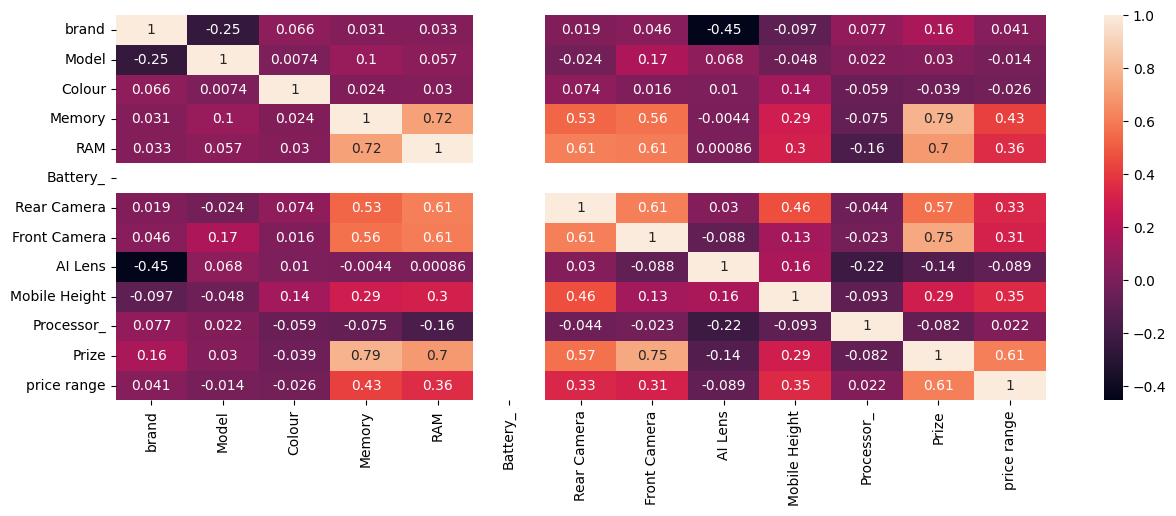

In [417]:
plt.figure(figsize = (15,5))
sns.heatmap(new_data.corr() , annot = True)
plt.show()

# linear regression

In [418]:
# apply linearregression

lr = LinearRegression()
lr.fit(x_train , y_train)
lr.score(x_train , y_train) * 100 , lr.score(x_test , y_test) * 100  #underfitting

(85.6675924233182, 83.84153278839624)

In [419]:
# lasso regression

lr1 = Lasso(alpha=4)
lr1.fit(x_train , y_train)
lr1.score(x_train , y_train) * 100 , lr1.score(x_test , y_test) * 100  #underfitting

(85.66689246242109, 83.78735712133076)

In [420]:
# ridge regression

lr2 = Ridge(alpha=0.05)
lr2.fit(x_train , y_train)
lr2.score(x_train , y_train) * 100 , lr2.score(x_test , y_test) * 100  #underfitting

(85.667590786492, 83.83814819526394)

# Decision tree algorithms

In [421]:
# decisiontree algorithms apply

lr3 = DecisionTreeRegressor(max_depth=5)
lr3.fit(x_train , y_train)
lr3.score(x_train , y_train) * 100 , lr3.score(x_test , y_test) * 100

(94.68643240854189, 93.02063286591866)

In [422]:
# post puning

for i in range(1,20) :
    lr3 =DecisionTreeRegressor(max_depth=i)
    lr3.fit(x_train , y_train)
    print(i,lr3.score(x_train , y_train) , lr3.score(x_test , y_test)) # find accurancy for model train

1 0.5279992573361199 0.3492183046272628
2 0.7454235792289854 0.5851582759849738
3 0.8651459595899709 0.8337023481212898
4 0.920685181905537 0.9026010902419985
5 0.9468643240854189 0.9302063286591865
6 0.9643065008497997 0.9466997452705415
7 0.9763104957171155 0.9499927777978703
8 0.985141780269372 0.939328201531977
9 0.9911195714714184 0.9388340244506213
10 0.9956138685276197 0.9550141730049547
11 0.9980156484375227 0.952495269696808
12 0.9987917057154468 0.9488047123249901
13 0.9991395276661312 0.9555675232780396
14 0.9995349671221981 0.9566026468854323
15 0.999605770963929 0.9507144361461182
16 0.999605770963929 0.956305225592459
17 0.999605770963929 0.9533590060618703
18 0.999605770963929 0.9559596255835652
19 0.999605770963929 0.9456869041985089


In [423]:
# Desicion tree find error using confusion matrics

print(mean_squared_error(y_test , lr3.predict(x_test))) 
print(mean_absolute_error(y_test , lr3.predict(x_test))) 
print(r2_score(y_test , lr3.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test , lr3.predict(x_test))))

2428574.8133333335
954.44
0.9456869041985089
1558.3885309297336


# randomforest algorithms

In [424]:
# randomforest algorithms apply

rf = RandomForestRegressor(n_estimators=25)
rf.fit(x_train , y_train)
rf.score(x_train , y_train) * 100 , rf.score(x_test , y_test) * 100   # overfitting

(98.31765400052733, 93.67198511989974)

In [425]:
# radomforest algorithms find error using confusion matrics

print(mean_squared_error(y_test , rf.predict(x_test))) 
print(mean_absolute_error(y_test , rf.predict(x_test)) )
print(r2_score(y_test , rf.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test , rf.predict(x_test))))

2829530.7659093332
1057.0506666666665
0.9367198511989975
1682.1209129873314


# support vector algorithms

In [426]:
# support vector algorithms apply

lr4 = SVR()
lr4.fit(x_train , y_train)
lr4.score(x_train , y_train) * 100 , lr4.score(x_test , y_test) * 100  # not model fit in dataset

(-3.888945722952708, -9.917320234614069)

# knn algorithms

In [427]:
# knn algorithms apply

lr5 = KNeighborsRegressor(n_neighbors= 2)
lr5.fit(x_train , y_train)
lr5.score(x_train , y_train) * 100 , lr5.score(x_test , y_test) * 100   # overfitting

(96.89326282799202, 91.54936912330248)

In [428]:
# knn algorithms find error using confusion matrics

print(mean_squared_error(y_test , lr5.predict(x_test)))
print(mean_absolute_error(y_test , lr5.predict(x_test))) 
print(r2_score(y_test , lr5.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test , lr5.predict(x_test))))

3778644.7266666666
1109.0266666666666
0.9154936912330248
1943.873639583259


In [429]:
# post puning

for i in range(1,30) :
    lr5 = KNeighborsRegressor(n_neighbors=i)
    lr5.fit(x_train , y_train)
    print(i,lr5.score(x_train , y_train) * 100 , lr5.score(x_test , y_test) * 100 )

1 99.92115419278579 97.21252607468936
2 96.89326282799202 91.54936912330248
3 94.34941141376493 86.87157189659919
4 93.23626873840377 83.96644911701382
5 91.51406404284354 82.20677900247122
6 89.98468425050051 80.56301089683782
7 88.67947554370235 79.19621839768433
8 88.00401705195425 78.87452395548435
9 87.2364575207887 77.14699136644568
10 86.24419694374468 76.81812927380355
11 85.91256949029196 75.51218571398131
12 85.14422338882059 75.30077524999201
13 84.27544352274532 75.61996099376282
14 83.55691246251813 75.21306161240746
15 83.46515861074171 74.82017683331694
16 83.19824053766499 75.14737917139882
17 83.01449378386792 74.66275184218392
18 82.83351304873618 74.1083441329975
19 82.58470182191404 73.82749158526902
20 82.22020585247111 73.6569643667838
21 81.65983796476397 73.27660471231063
22 81.36141209944815 73.16261011422478
23 81.2824245467025 73.13432454575727
24 81.16697824151528 72.91265727627328
25 80.79657374983024 72.48205091062331
26 80.69965106949586 72.11942126205079

In [430]:
x_test

,brand,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,price range
327,0.340656,-0.284888,-1.495540,2.917261,1.493212,0.0,0.204701,4.239413,-0.257084,-2.239743,-1.763946,-3.315928
33,0.340656,-0.253384,-0.258530,-0.698453,-0.583570,0.0,-1.255006,-1.030000,-0.257084,-0.984008,0.223945,-0.344408
15,1.275100,1.069751,-1.532465,0.506785,1.493212,0.0,0.204701,-0.444510,-0.257084,0.020579,-1.865890,-0.344408
314,0.340656,-0.316391,-1.440151,2.917261,1.493212,0.0,0.125798,0.531307,-0.257084,0.271726,-1.916861,2.627112
57,-0.360176,0.187661,-0.332381,0.506785,0.454821,0.0,0.204701,-0.444510,-0.257084,0.020579,0.122002,-0.344408
...,...,...,...,...,...,...,...,...,...,...,...,...
94,1.041489,-1.734036,0.923092,-0.698453,-0.583570,0.0,0.204701,1.116798,-0.257084,-2.239743,0.172974,-0.344408
195,1.041489,0.313674,0.830778,-0.698453,-0.583570,0.0,0.125798,1.116798,-0.257084,-0.984008,-0.744515,-0.344408
311,0.107045,-1.387500,-1.089357,-1.301072,-1.102766,0.0,-1.255006,-1.030000,-0.257084,-0.582173,-1.611032,-0.344408
292,-1.761842,0.691712,1.107721,-0.698453,0.454821,0.0,0.204701,1.116798,3.889786,1.577690,-0.387714,-0.344408


In [431]:
y_test

327    40999.0
33      7299.0
15     15999.0
314    32999.0
57     14499.0
        ...   
94     12499.0
195    13499.0
311     7990.0
292    14999.0
346    16999.0
Name: Prize, Length: 75, dtype: float64

In [432]:
r = x_test.iloc[73].tolist()
r

[-1.761841775639232,
 0.6917121806530991,
 1.1077205548095634,
 -0.6984533294742344,
 0.45482089041458107,
 0.0,
 0.20470144236197324,
 1.1167977934461522,
 3.8897859558860945,
 1.5776898685038943,
 -0.3877137520777196,
 -0.3444080207880856]

In [433]:
lr3.predict([r])  # decision tree

array([14999.])

In [434]:
lr5.predict([r])  # knn 

array([12940.31034483])

# observation

1. we have applied different machine learning algorithms in dataset and compare accurancy each other
2. so suitable best model is desicion tree for our dataset
3. Decision tree model price predict accurate our mobile price in dataset




# =================== end of project ===================